In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, roc_auc_score


import seaborn as sns
import matplotlib.pyplot as plt 


# For Machine LEarning Pipeline
from sklearn.pipeline import make_pipeline 

# For Standardising The Data
from sklearn.preprocessing import StandardScaler 

# Different Machine Learning Models    
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC # Support vector machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
parkn_data = pd.read_csv('parkinsons.csv')
parkn_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
parkn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
parkn_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Model

In [6]:
X = parkn_data.drop(columns=['status','name'],axis=1)
Y = parkn_data['status']


In [7]:
list_of_models = {
    "lr":"LogisticRegression",
    # 'rc':"RidgeClassifier",
    'rf':"RandomForestClassifier",
    'gb':"GradientBoostingClassifier",
    'svm':"Support Vector Machine",
    'knn':"KNeighborsClassifier",
    'nb':"Naive Bayes",
}
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    # 'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'svm':make_pipeline(StandardScaler(), SVC(probability=True)),
    'knn':make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3)),
    'nb':make_pipeline(StandardScaler(), GaussianNB()),
}
list(pipelines.values())

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(probability=True))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())])]

In [14]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

In [16]:
results_list = []

In [18]:
results = {algo: [] for algo in pipelines.keys()}
for test_size in test_sizes:
    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    # Loop through all models in the pipelines
    for algo, model in pipelines.items():
        # Fit the model
        model.fit(X_train, Y_train)
        
        # Make predictions
        yhat = model.predict(X_test)
        
        # Calculate performance metrics
        acc = accuracy_score(Y_test, yhat)
        prec = precision_score(Y_test, yhat, average='weighted')
        rec = recall_score(Y_test, yhat, average='weighted')
        f1 = f1_score(Y_test, yhat, average='weighted')
        bal_acc = balanced_accuracy_score(Y_test, yhat)
        # auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None

        if hasattr(model, 'predict_proba'):
            y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
            auc = roc_auc_score(Y_test, y_probs)
            fpr, tpr, _ = roc_curve(Y_test, y_probs)
        # Store results
            results[algo].append({
                'test_size': test_size,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
                'bal_acc':bal_acc,
                'fpr':fpr,
                'tpr':tpr
            })
            results_list.append({
                'Algorithm': algo,
                'Test_size': test_size,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
                'bal_acc':bal_acc})


In [19]:
for algo, metrics in results.items():
    print(f"\nResults for {algo}:")
    for metric in metrics:
        # tsize = f"{int(metric['test_size']*100)}:{100-metric['test_size']*100)}"
        tsize = f"{int(metric['test_size'] * 100)}% : {int((1 - metric['test_size']) * 100)}%"

        print(f"Test Size: {tsize}\t,| Accuracy: {metric['accuracy']:.3f},| Precision: {metric['precision']:.3f}, "
              f"| Recall: {metric['recall']:.3f},| F1 Score: {metric['f1']:.3f},| Balance Accuracy: {metric['bal_acc']:.3f}")


Results for lr:
Test Size: 10% : 90%	,| Accuracy: 0.950,| Precision: 0.953, | Recall: 0.950,| F1 Score: 0.942,| Balance Accuracy: 0.750
Test Size: 20% : 80%	,| Accuracy: 0.897,| Precision: 0.909, | Recall: 0.897,| F1 Score: 0.880,| Balance Accuracy: 0.714
Test Size: 30% : 70%	,| Accuracy: 0.864,| Precision: 0.861, | Recall: 0.864,| F1 Score: 0.857,| Balance Accuracy: 0.777
Test Size: 40% : 60%	,| Accuracy: 0.859,| Precision: 0.854, | Recall: 0.859,| F1 Score: 0.855,| Balance Accuracy: 0.791
Test Size: 50% : 50%	,| Accuracy: 0.857,| Precision: 0.857, | Recall: 0.857,| F1 Score: 0.857,| Balance Accuracy: 0.801

Results for rf:
Test Size: 10% : 90%	,| Accuracy: 0.900,| Precision: 0.900, | Recall: 0.900,| F1 Score: 0.900,| Balance Accuracy: 0.722
Test Size: 20% : 80%	,| Accuracy: 0.923,| Precision: 0.920, | Recall: 0.923,| F1 Score: 0.921,| Balance Accuracy: 0.842
Test Size: 30% : 70%	,| Accuracy: 0.932,| Precision: 0.938, | Recall: 0.932,| F1 Score: 0.928,| Balance Accuracy: 0.867
Test S

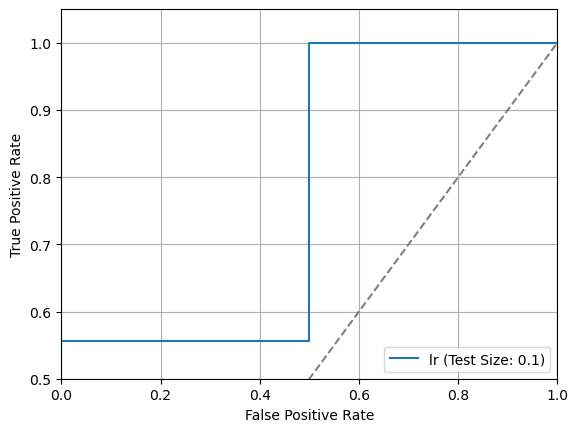

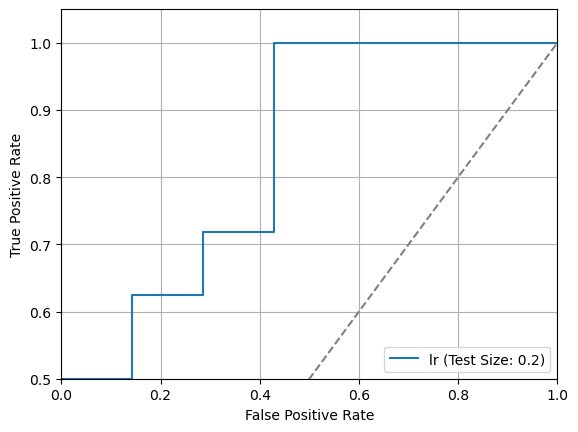

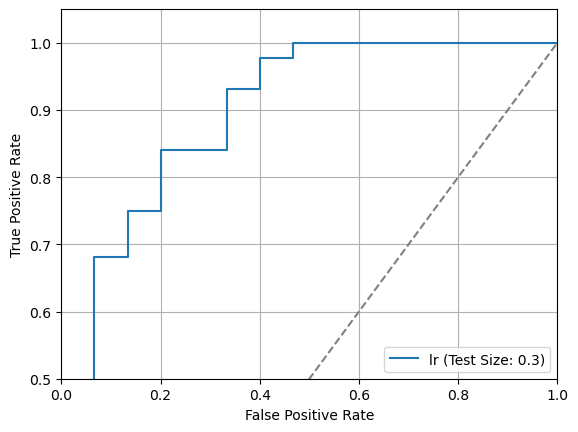

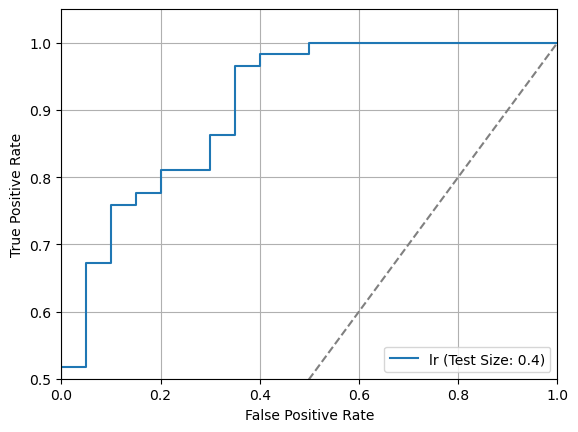

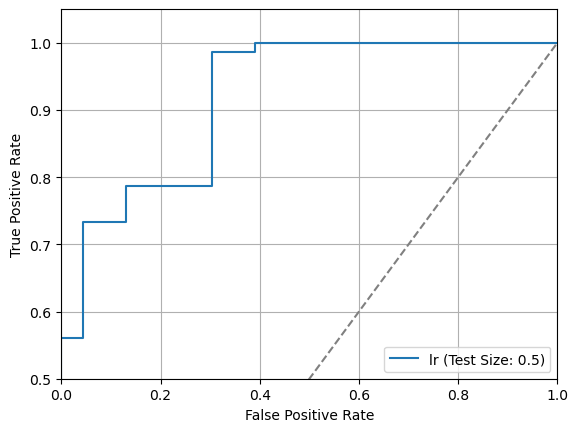

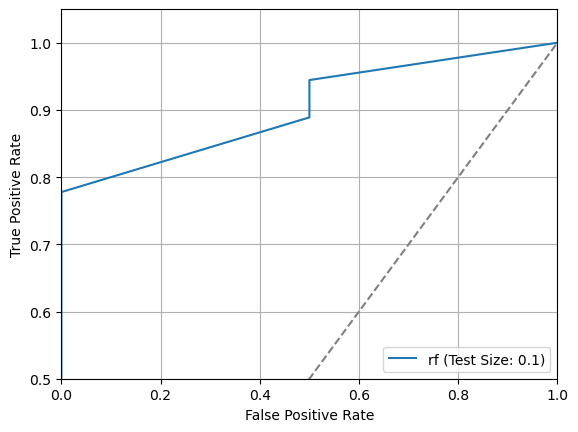

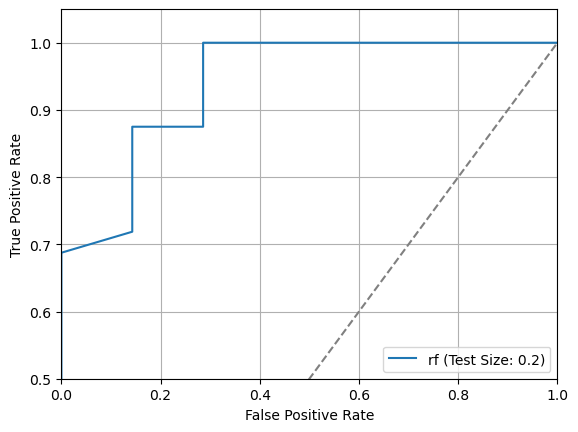

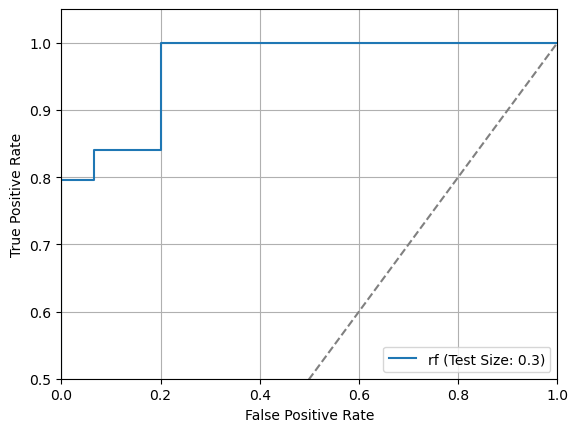

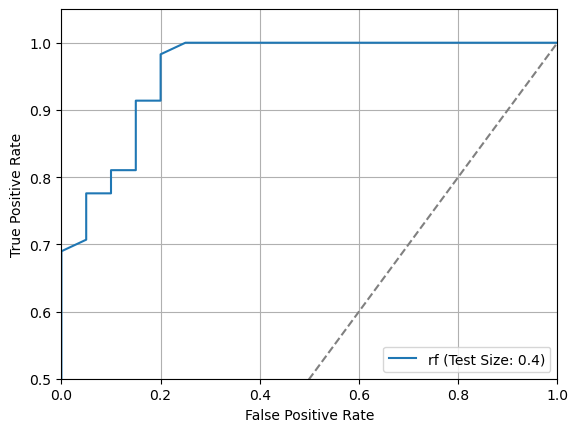

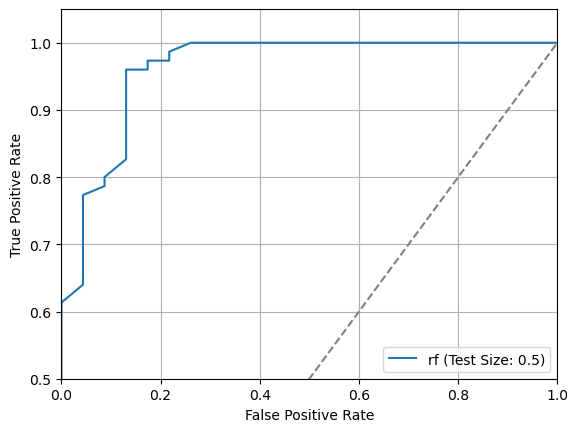

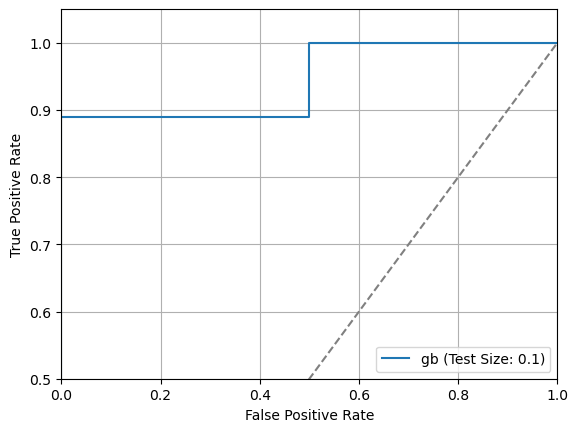

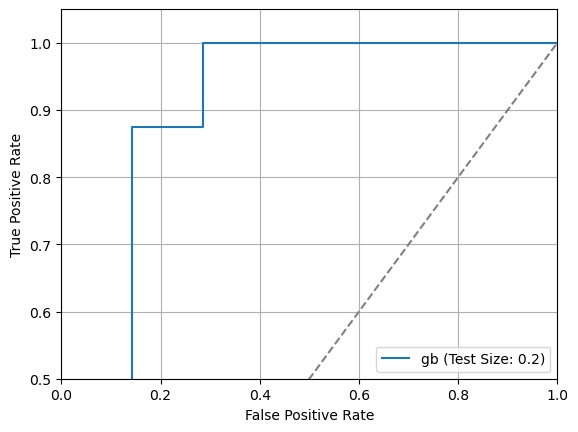

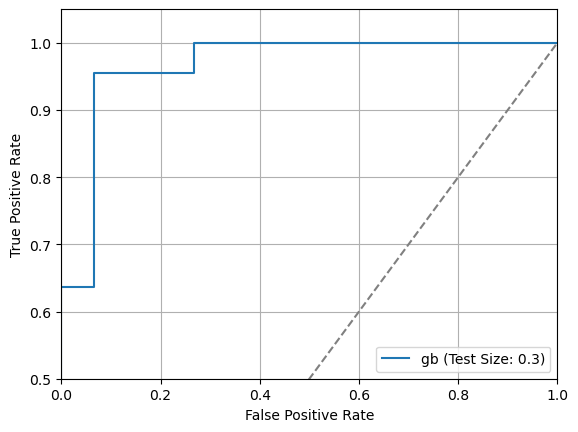

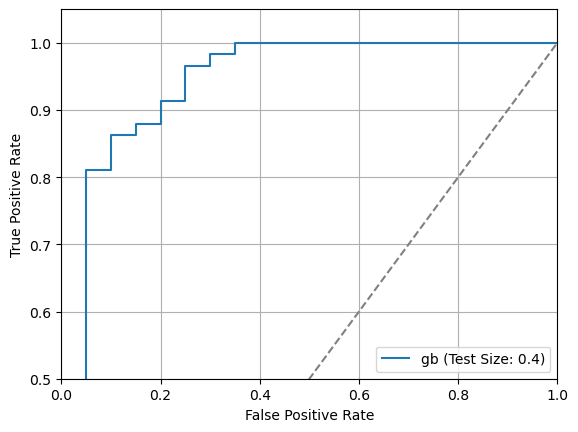

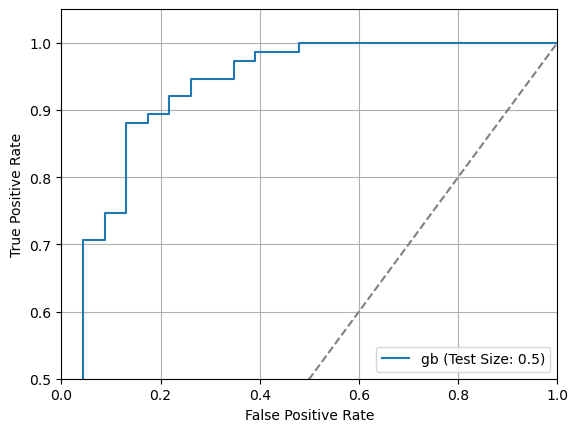

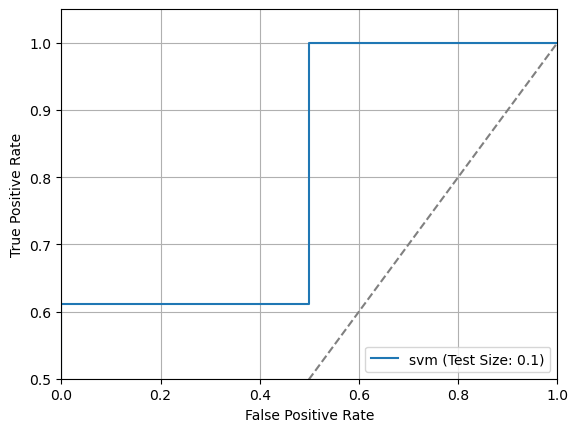

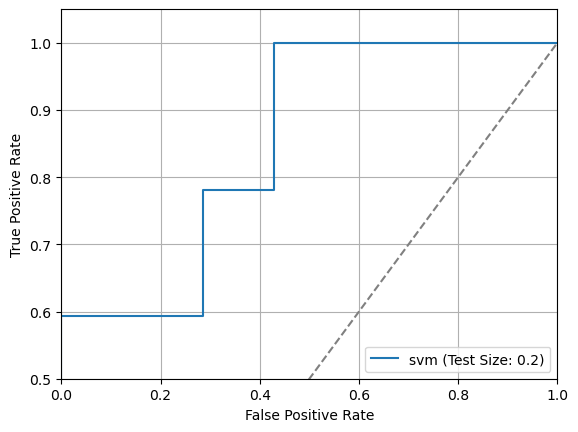

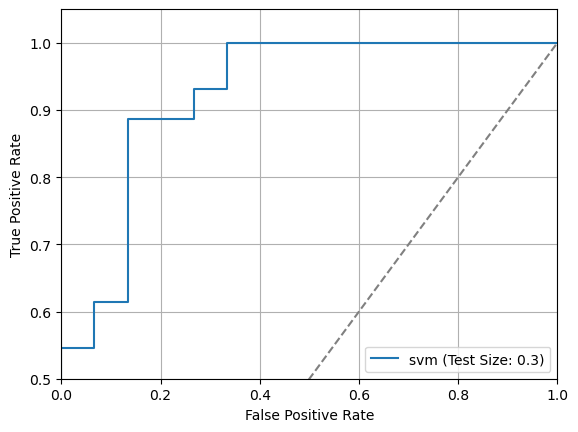

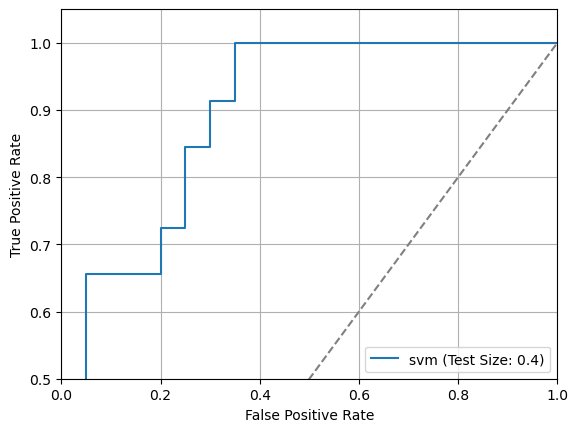

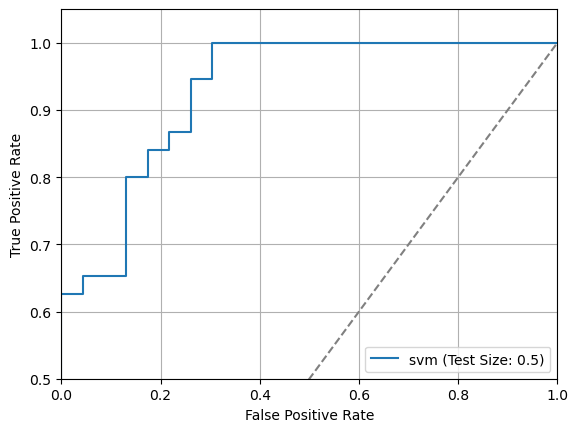

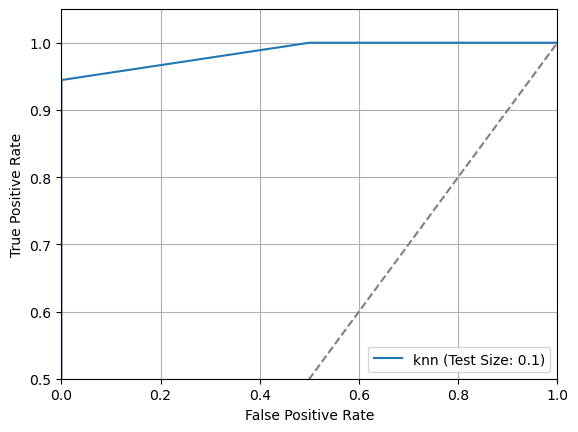

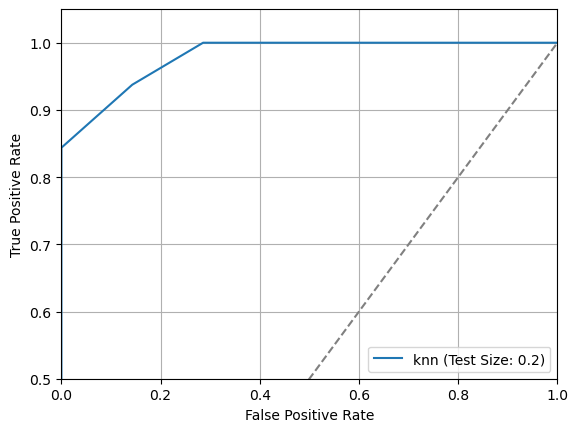

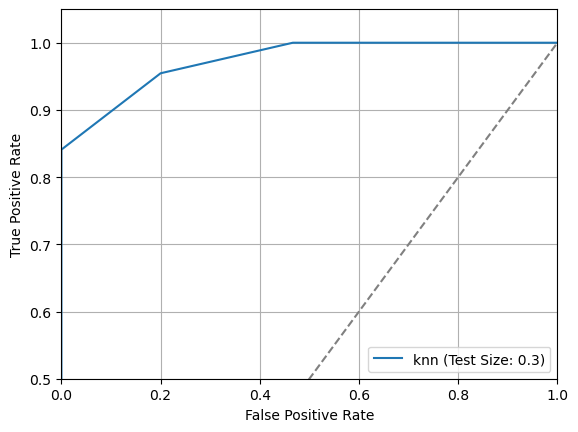

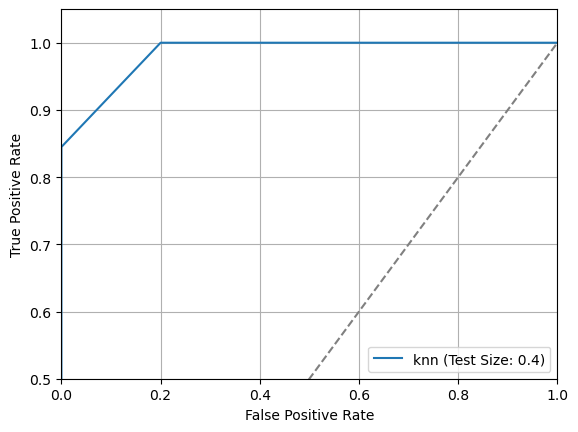

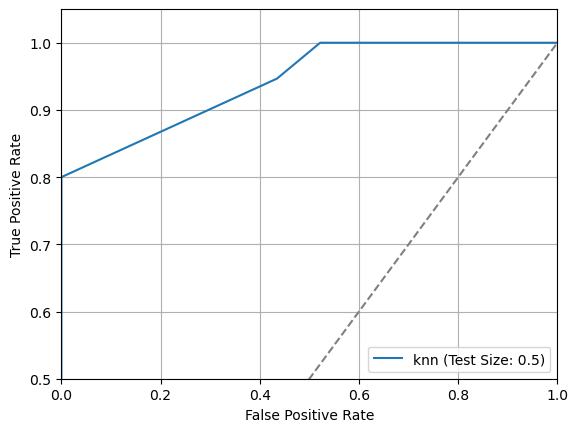

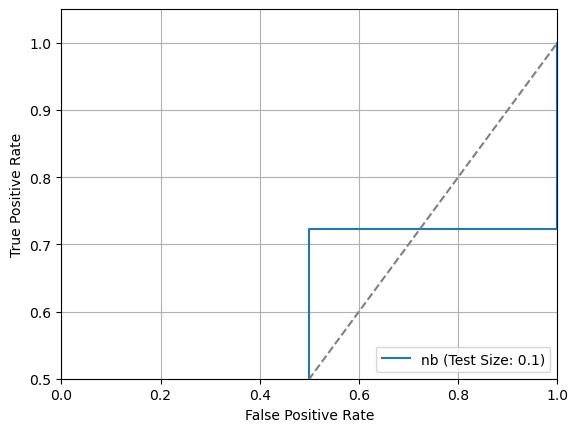

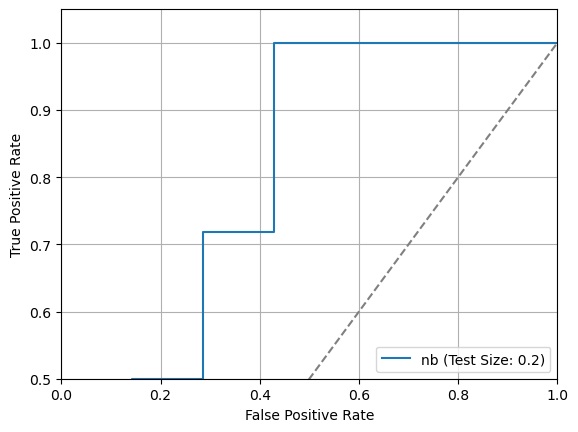

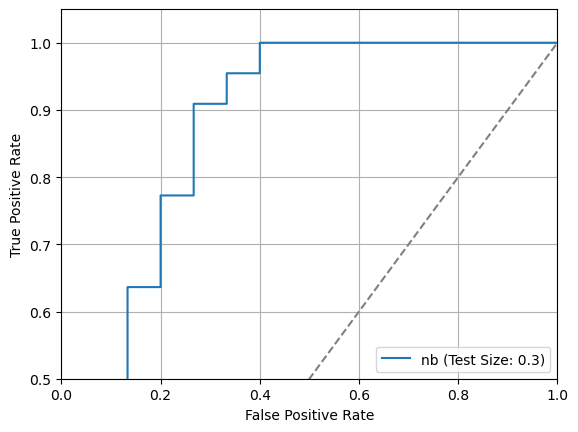

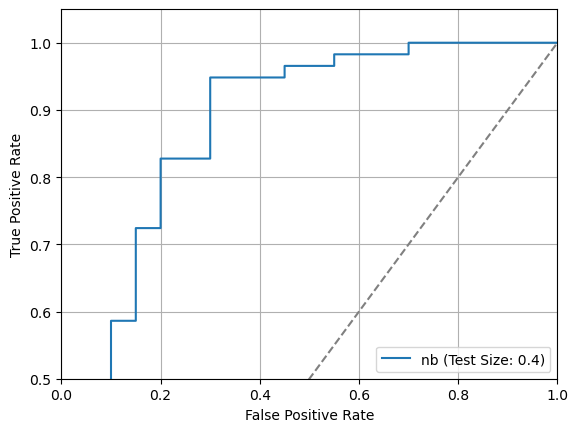

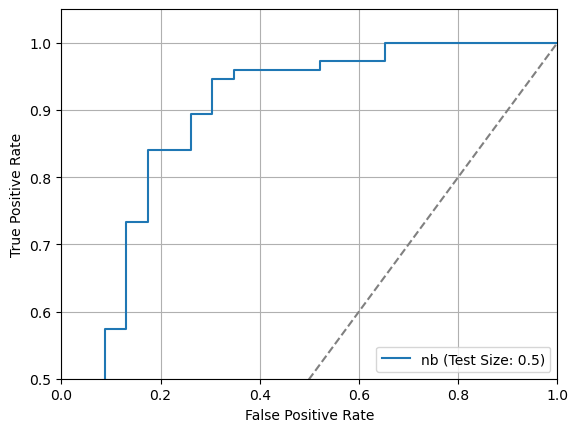

In [22]:
import os

output_folder = "ROC"
os.makedirs(output_folder, exist_ok=True)


#plt.figure(figsize=(15,15))
#plt.title('ROC Curves for Multiple Models')
for algo, metrics in results.items():
    for metric in metrics:
        fpr = metric['fpr']
        tpr = metric['tpr']
        test_size = metric["test_size"]
        plt.figure()  
        plt.plot(fpr, tpr, label=f'{algo} (Test Size: {metric["test_size"]})')

# Plot the diagonal line representing random guessing
        plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
        
        # Configure plot limits and labels
        plt.xlim([0.0, 1.0])
        plt.ylim([0.5, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')  # Show the legend
        plt.grid(True)  # Add grid for clarity

        filename = f"{algo}_test_size_{test_size}.png"
        plt.savefig(os.path.join(output_folder, filename))
        plt.show()

In [61]:
results_list

[{'Algorithm': 'lr',
  'Test_size': 0.1,
  'accuracy': 0.95,
  'precision': 0.9526315789473683,
  'recall': 0.95,
  'f1': 0.9423423423423424,
  'bal_acc': 0.75},
 {'Algorithm': 'rf',
  'Test_size': 0.1,
  'accuracy': 0.85,
  'precision': 0.8803921568627452,
  'recall': 0.85,
  'f1': 0.8628571428571428,
  'bal_acc': 0.6944444444444444},
 {'Algorithm': 'gb',
  'Test_size': 0.1,
  'accuracy': 0.9,
  'precision': 0.9,
  'recall': 0.9,
  'f1': 0.9,
  'bal_acc': 0.7222222222222222},
 {'Algorithm': 'svm',
  'Test_size': 0.1,
  'accuracy': 0.95,
  'precision': 0.9526315789473683,
  'recall': 0.95,
  'f1': 0.9423423423423424,
  'bal_acc': 0.75},
 {'Algorithm': 'knn',
  'Test_size': 0.1,
  'accuracy': 0.95,
  'precision': 0.9666666666666666,
  'recall': 0.95,
  'f1': 0.9542857142857143,
  'bal_acc': 0.9722222222222222},
 {'Algorithm': 'nb',
  'Test_size': 0.1,
  'accuracy': 0.65,
  'precision': 0.78,
  'recall': 0.65,
  'f1': 0.7090909090909091,
  'bal_acc': 0.3611111111111111},
 {'Algorithm': '

In [63]:
results_df = pd.DataFrame(results_list)

# Specify the Excel file path
excel_file_path = 'model_results.xlsx'

# Write the DataFrame to an Excel file
results_df.to_excel(excel_file_path, index=False)